### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : bitcoin_cash_price.csv 
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/cryptocurrencypricehistory/bitcoin_cash_price.csv')
print(df.shape)
df.head()

(45, 7)


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",514.90,550.95,458.78,541.71,"338,978,000","8,527,100,000"
1,"Sep 04, 2017",608.26,608.26,500.75,517.24,"328,957,000","10,072,200,000"
2,"Sep 03, 2017",578.27,617.41,563.59,607.43,"344,862,000","9,574,520,000"
3,"Sep 02, 2017",621.96,642.05,560.58,575.90,"350,478,000","10,297,000,000"
4,"Sep 01, 2017",588.40,645.52,586.73,622.17,"393,839,000","9,740,460,000"


In [2]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
40,"Jul 27, 2017",417.10,460.97,367.78,385.48,"533,207",-
41,"Jul 26, 2017",407.08,486.16,321.79,365.82,"1,784,640",-
42,"Jul 25, 2017",441.35,541.66,338.09,406.90,"524,908",-
43,"Jul 24, 2017",412.58,578.89,409.21,440.70,"190,952",-
44,"Jul 23, 2017",555.89,578.97,411.78,413.06,"85,013",-


In [3]:
# Count missing data in each column
missing_date   = df.Date.isnull().sum()
missing_open   = df.Open.isnull().sum()
missing_high   = df.High.isnull().sum()
missing_low    = df.Low.isnull().sum()
missing_close  = df.Close.isnull().sum()
missing_volume = df.Volume.isnull().sum()
missing_market_cap = df['Market Cap'].isnull().sum()

missing_data = pd.DataFrame([[missing_date,missing_open, missing_high, missing_low,missing_close,missing_volume,missing_market_cap]],
                            columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])

missing_data

,Date,Open,High,Low,Close,Volume,Market Cap
0,0,0,0,0,0,0,0


Problem : 
1. Data in some columns ('Volume' and 'Market Cap') written in different format. Python recognize it as string not    a number. 
2. There are missing data in 'Market Cap' column 

Solution : 
1. Convert all string data to float
2. 'Market cap' calculated by multiplying share outstanding by market price. Therefore, I'm going to use interpolation method to fill the missing data in Market Cap.     

In [4]:
#Replace missing data as NaN
df.replace('-', np.nan,inplace=True)
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
40,"Jul 27, 2017",417.10,460.97,367.78,385.48,"533,207",NaN
41,"Jul 26, 2017",407.08,486.16,321.79,365.82,"1,784,640",NaN
42,"Jul 25, 2017",441.35,541.66,338.09,406.90,"524,908",NaN
43,"Jul 24, 2017",412.58,578.89,409.21,440.70,"190,952",NaN
44,"Jul 23, 2017",555.89,578.97,411.78,413.06,"85,013",NaN


In [5]:
#convert data to float
def convert_to_float(x):
    try:
        return float(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_float)
df['Market Cap'] = df['Market Cap'].apply(convert_to_float)
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,45.000000,45.000000,45.000000,45.000000,4.500000e+01,3.500000e+01
mean,461.323333,528.302889,412.777556,459.134667,4.196584e+08,7.883221e+09
std,155.461942,181.817928,151.387218,154.506075,6.792123e+08,2.815761e+09
min,212.180000,223.700000,200.980000,213.150000,8.501300e+04,3.497290e+09
25%,321.350000,373.870000,293.100000,319.690000,1.076060e+08,5.123560e+09
50%,417.100000,541.660000,364.050000,413.060000,2.162730e+08,8.527100e+09
75%,596.190000,645.520000,570.270000,599.630000,3.938390e+08,1.027590e+10
max,772.420000,1091.970000,683.940000,754.560000,3.196230e+09,1.274260e+10


To make sure what kind of interpolation, let's plot data between Market Cap and other variable. 

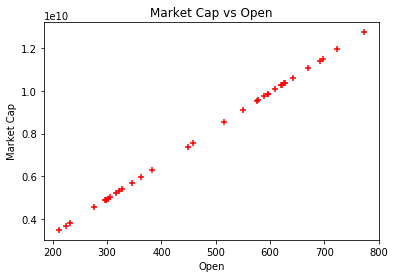

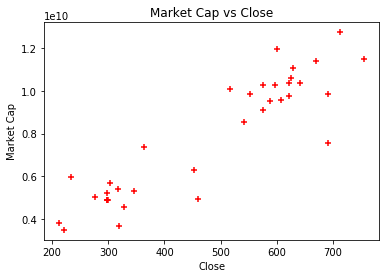

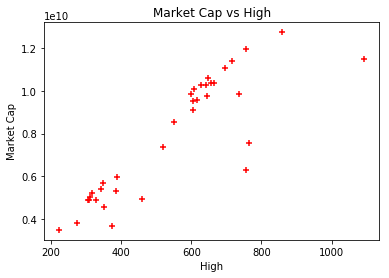

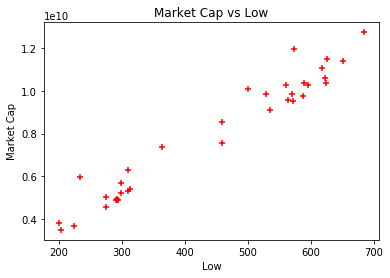

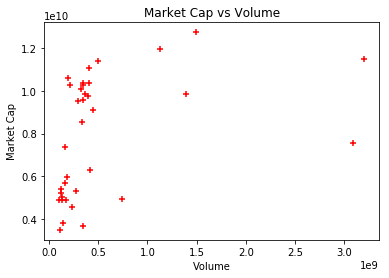

In [12]:
import matplotlib.pyplot as plt

def plot_data(xdata,ydata,xlabel):
    plt.title('Market Cap vs ' + xlabel)
    plt.scatter(xdata,ydata,marker='+',color='red')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
    plt.show()

plot_data(df.Open, df['Market Cap'],'Open')
plot_data(df.Close, df['Market Cap'],'Close')
plot_data(df.High, df['Market Cap'],'High')
plot_data(df.Low, df['Market Cap'],'Low')
plot_data(df.Volume, df['Market Cap'],'Volume')

The figures above show that Open and Market Cap has the best relationship (Linear relationship).

In [7]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']].iloc[0:35]
Market_Cap  = df['Market Cap'].iloc[0:35]


In [8]:
# train data (35 First data) using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# Model Score
model.score(Open, Market_Cap)

0.9999801609861945

In [13]:
open = df[['Open']]
market_cap_predict = model.predict(open) 
df['Market Cap Predict'] = market_cap_predict 
df.tail(15)

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
30,"Aug 06, 2017",212.18,223.70,203.44,220.66,107606000.0,3.497290e+09,3.494426e+09
31,"Aug 05, 2017",231.11,273.04,200.98,213.15,144043000.0,3.809330e+09,3.807903e+09
32,"Aug 04, 2017",362.18,386.93,233.05,233.05,185038000.0,5.969720e+09,5.978398e+09
33,"Aug 03, 2017",448.49,519.28,364.05,364.05,161518000.0,7.392030e+09,7.407675e+09
34,"Aug 02, 2017",382.38,756.93,309.33,452.66,416207000.0,6.302360e+09,6.312906e+09
35,"Aug 01, 2017",294.60,426.11,210.38,380.01,65988800.0,NaN,4.859286e+09
36,"Jul 31, 2017",346.36,347.82,266.19,294.46,1075960.0,NaN,5.716422e+09
37,"Jul 30, 2017",385.14,385.14,316.25,345.66,606695.0,NaN,6.358611e+09
38,"Jul 29, 2017",410.56,423.73,323.73,384.77,737815.0,NaN,6.779562e+09
39,"Jul 28, 2017",386.65,465.18,217.06,406.05,1230160.0,NaN,6.383617e+09
